In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore_user_reviews.csv')

In [3]:
df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [4]:
print(df.isnull().sum())

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


In [5]:
df.isnull().sum().sum()

107457

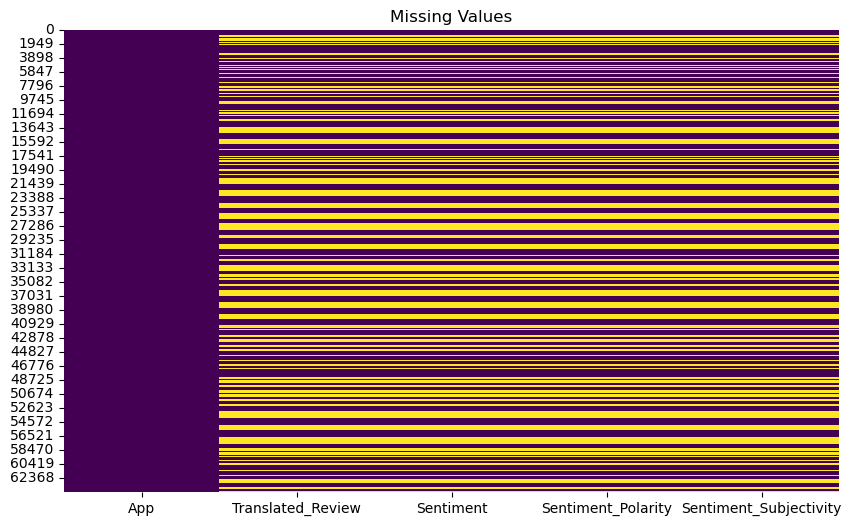

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

plt.title("Missing Values")
plt.show()

In [7]:
print(df.shape)

(64295, 5)


In [8]:
df = df.dropna()

In [9]:
df = df.drop_duplicates()

In [10]:
print(df.shape)

(29692, 5)


In [11]:
print(df.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


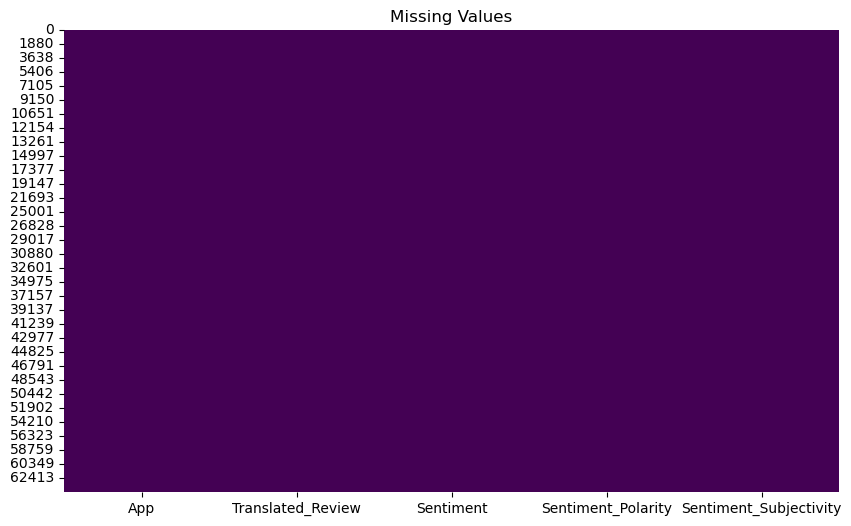

In [12]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

plt.title("Missing Values")
plt.show()

In [13]:
df.head(20)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.000000,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.250000,0.288462
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.400000,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.000000,0.300000
5,10 Best Foods for You,Best way,Positive,1.000000,0.300000
6,10 Best Foods for You,Amazing,Positive,0.600000,0.900000
8,10 Best Foods for You,"Looking forward app,",Neutral,0.000000,0.000000
9,10 Best Foods for You,It helpful site ! It help foods get !,Neutral,0.000000,0.000000
10,10 Best Foods for You,good you.,Positive,0.700000,0.600000
11,10 Best Foods for You,Useful information The amount spelling errors ...,Positive,0.200000,0.100000


In [14]:
print(df['Sentiment'].value_counts())

Sentiment
Positive    19015
Negative     6321
Neutral      4356
Name: count, dtype: int64


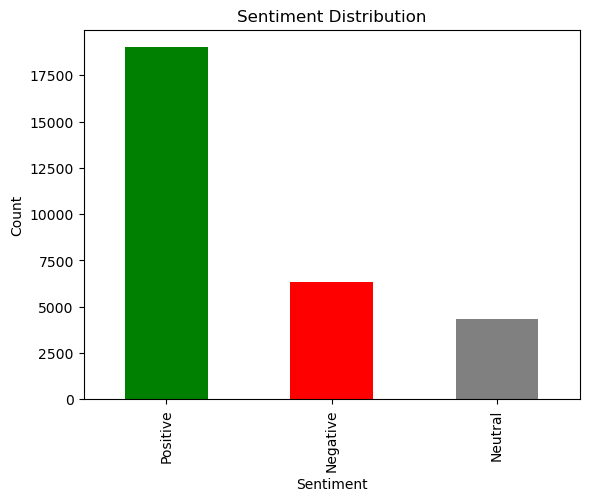

In [15]:
import matplotlib.pyplot as plt

df['Sentiment'].value_counts().plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [16]:
# Check if there are any negative reviews
negative_reviews = df[df['Sentiment'] == 'Negative']

# Display the count and the reviews if present
print(f"Number of negative reviews: {len(negative_reviews)}")
print(negative_reviews[['App', 'Translated_Review', 'Sentiment']])


Number of negative reviews: 6321
                                  App  \
32              10 Best Foods for You   
43              10 Best Foods for You   
68              10 Best Foods for You   
85              10 Best Foods for You   
95              10 Best Foods for You   
...                               ...   
64215  Housing-Real Estate & Property   
64216  Housing-Real Estate & Property   
64220  Housing-Real Estate & Property   
64226  Housing-Real Estate & Property   
64230  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  
32                    No recipe book Unable recipe book.  Negative  
43     Waste time It needs internet time n ask calls ...  Negative  
68                               Faltu plz waste ur time  Negative  
85                                     Crap Doesn't work  Negative  
95     Boring. I thought actually just texts that's i...  Negative  
...                                                  ...    

AttributeError: module 'matplotlib.pyplot' has no attribute 'ylab'

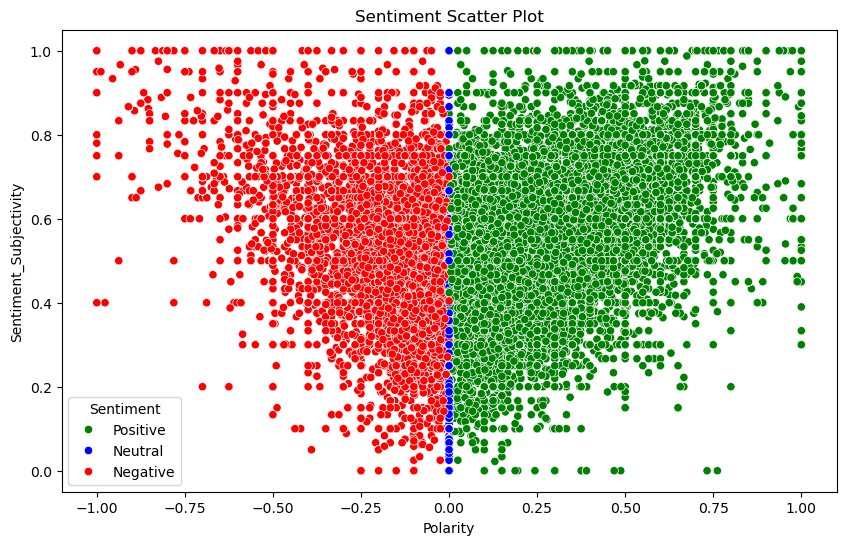

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(10, 6))

# Create scatter plot
sns.scatterplot(
    data=df,
    x='Sentiment_Polarity',
    y='Sentiment_Subjectivity',
    hue='Sentiment',
    palette={'Positive': 'green', 'Negative': 'red', 'Neutral': 'blue'}
)

# Plot labels and title
plt.title('Sentiment Scatter Plot')
plt.xlabel('Polarity')
plt.ylab


In [19]:
print(df.isnull().sum())

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64


In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Load data (assuming your DataFrame is already named df)
df = df.dropna(subset=['Translated_Review', 'Sentiment'])  # Remove missing entries

# Step 1: Text vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english')
X = tfidf.fit_transform(df['Translated_Review'])  # Feature matrix
y = df['Sentiment']  # Target labels

# Step 2: Train-test split (we'll train now, test later)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

print("✅ Model training completed.")


✅ Model training completed.


In [23]:
print(df.shape)

(29692, 5)


In [24]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Step 4: Predict on the test data
y_pred = model.predict(X_test)

# Step 5: Evaluate the model
print("🔍 Accuracy:", accuracy_score(y_test, y_pred))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n📄 Classification Report:\n", classification_report(y_test, y_pred))


🔍 Accuracy: 0.8676544872874221

📊 Confusion Matrix:
 [[ 915   71  286]
 [  36  622  213]
 [  75  105 3616]]

📄 Classification Report:
               precision    recall  f1-score   support

    Negative       0.89      0.72      0.80      1272
     Neutral       0.78      0.71      0.75       871
    Positive       0.88      0.95      0.91      3796

    accuracy                           0.87      5939
   macro avg       0.85      0.80      0.82      5939
weighted avg       0.87      0.87      0.86      5939



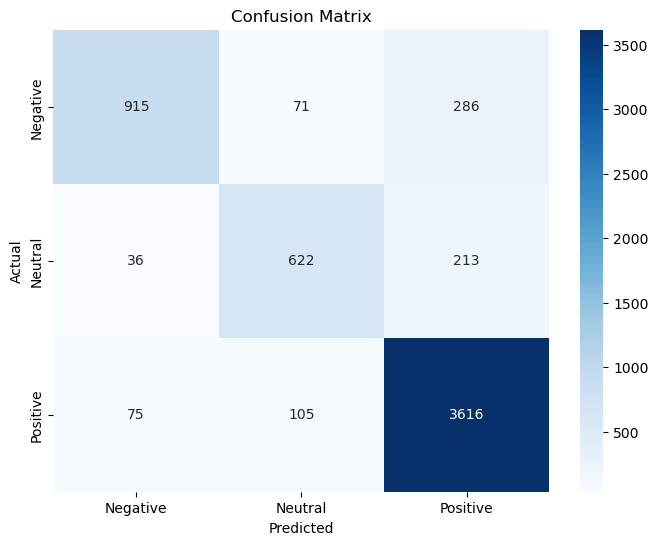

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(df['Sentiment'].unique())  # Get the unique sentiment labels

# Plot using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


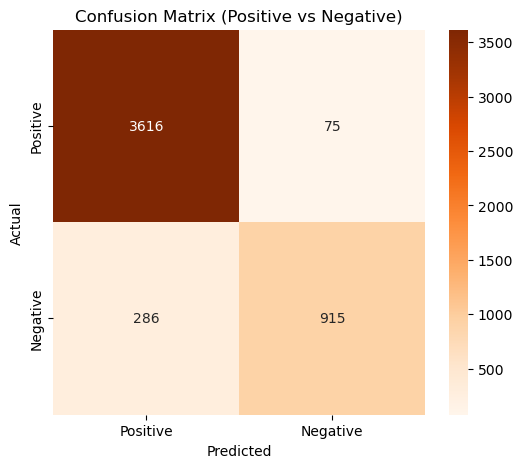

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Filter only Positive and Negative sentiments
mask = (y_test == 'Positive') | (y_test == 'Negative')
y_test_binary = y_test[mask]
y_pred_binary = pd.Series(y_pred, index=y_test.index)[mask]

# Create the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary, labels=['Positive', 'Negative'])

# Plot the matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title("Confusion Matrix (Positive vs Negative)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [28]:
from sklearn.metrics import accuracy_score

# Filter only Positive and Negative sentiments
mask = (y_test == 'Positive') | (y_test == 'Negative')
y_test_binary = y_test[mask]
y_pred_binary = pd.Series(y_pred, index=y_test.index)[mask]

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
error_rate = 1 - accuracy

# Print results
print(f"✅ Accuracy (Positive vs Negative): {accuracy:.2f}")
print(f"❌ Error Rate (Positive vs Negative): {error_rate:.2f}")


✅ Accuracy (Positive vs Negative): 0.89
❌ Error Rate (Positive vs Negative): 0.11


In [29]:
# Re-train the Logistic Regression model with class_weight='balanced'
model = LogisticRegression(class_weight='balanced')
model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced')

In [30]:
# Re-predict and filter for Positive vs Negative
y_pred = model.predict(X_test)
mask = (y_test == 'Positive') | (y_test == 'Negative')
y_test_binary = y_test[mask]
y_pred_binary = pd.Series(y_pred, index=y_test.index)[mask]

# Show classification report
from sklearn.metrics import classification_report
print(classification_report(y_test_binary, y_pred_binary, target_names=['Positive', 'Negative']))


ValueError: Number of classes, 3, does not match size of target_names, 2. Try specifying the labels parameter

In [31]:
from sklearn.metrics import classification_report

# Show classification report, but only for Positive and Negative classes
print(classification_report(y_test_binary, y_pred_binary, labels=['Positive', 'Negative'], target_names=['Positive', 'Negative']))


              precision    recall  f1-score   support

    Positive       0.97      0.84      0.90      3796
    Negative       0.79      0.82      0.80      1272

   micro avg       0.92      0.84      0.88      5068
   macro avg       0.88      0.83      0.85      5068
weighted avg       0.93      0.84      0.88      5068



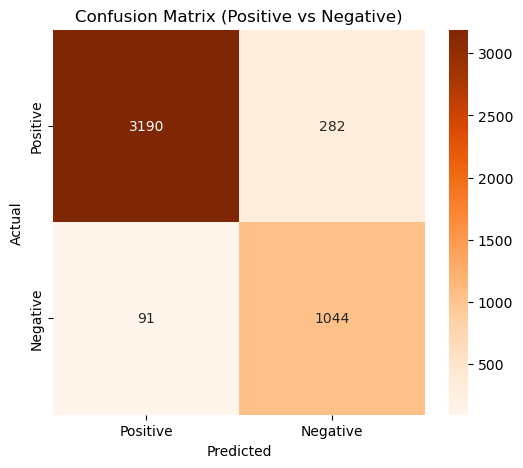

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Filter only Positive and Negative sentiments
mask = (y_test == 'Positive') | (y_test == 'Negative')
y_test_binary = y_test[mask]
y_pred_binary = pd.Series(y_pred, index=y_test.index)[mask]

# Create the confusion matrix
cm = confusion_matrix(y_test_binary, y_pred_binary, labels=['Positive', 'Negative'])

# Plot the matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.title("Confusion Matrix (Positive vs Negative)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [33]:
# Sample: Check predictions for a few Negative reviews (or any subset)
sample_reviews = negative_reviews[['Translated_Review', 'Sentiment']].head(10)  # Get top 10 reviews
X_sample = tfidf.transform(sample_reviews['Translated_Review'])  # Convert the reviews to features

# Predict sentiment for these reviews
y_pred_sample = model.predict(X_sample)

# Print each review with the actual and predicted sentiment
for review, actual, predicted in zip(sample_reviews['Translated_Review'], sample_reviews['Sentiment'], y_pred_sample):
    print(f"Review: {review}\nActual: {actual}\nPredicted: {predicted}\n")


Review: No recipe book Unable recipe book.
Actual: Negative
Predicted: Negative

Review: Waste time It needs internet time n ask calls information
Actual: Negative
Predicted: Negative

Review: Faltu plz waste ur time
Actual: Negative
Predicted: Negative

Review: Crap Doesn't work
Actual: Negative
Predicted: Negative

Review: Boring. I thought actually just texts that's it. Too poor old texts....
Actual: Negative
Predicted: Negative

Review: Not bad, price little bit expensive
Actual: Negative
Predicted: Negative

Review: Horrible ID verification
Actual: Negative
Predicted: Negative

Review: There is nothing missing ~ !!!
Actual: Negative
Predicted: Negative

Review: Refund takes long.. 3 days still received money.. crazy
Actual: Negative
Predicted: Negative

Review: I am trying to update every time but I do not stall. It's still difficult to search, and I'm tired of seeing categories by category. The benefits are getting less and less.
Actual: Negative
Predicted: Negative



In [35]:
# Filter out Positive and Negative reviews
positive_reviews = df[df['Sentiment'] == 'Positive']
negative_reviews = df[df['Sentiment'] == 'Negative']

# Extract features (TF-IDF) for both Positive and Negative reviews
X_positive = tfidf.transform(positive_reviews['Translated_Review'])
X_negative = tfidf.transform(negative_reviews['Translated_Review'])

# Predict sentiment for both Positive and Negative reviews
y_pred_positive = model.predict(X_positive)
y_pred_negative = model.predict(X_negative)

# Print predictions for Positive reviews
print("Predictions for Positive Reviews:")
for review, actual, predicted in zip(positive_reviews['Translated_Review'], positive_reviews['Sentiment'], y_pred_positive):
    print(f"Review: {review}\nActual: {actual}\nPredicted: {predicted}\n")

# Print predictions for Negative reviews
print("\nPredictions for Negative Reviews:")
for review, actual, predicted in zip(negative_reviews['Translated_Review'], negative_reviews['Sentiment'], y_pred_negative):
    print(f"Review: {review}\nActual: {actual}\nPredicted: {predicted}\n")


IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [38]:
# Function to predict sentiment of a review
def predict_sentiment(review):
    # Transform the review to match the model input
    review_transformed = tfidf.transform([review])
    
    # Predict sentiment (Positive or Negative)
    prediction = model.predict(review_transformed)[0]
    
    return prediction

# Example: Predict sentiment for a new review
review = "The product not woring properly"
predicted_sentiment = predict_sentiment(review)
print(f"The review sentiment is: {predicted_sentiment}")


The review sentiment is: Neutral


In [39]:
import joblib

# Save model and vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']